In [367]:
cd

/Users/fabiannemazi


In [368]:
cd fag_nmbu/Dat200/CA2/Data

/Users/fabiannemazi/Fag_nmbu/Dat200/CA2/Data


### Importing the nessescary packages

In [383]:
import pandas as pd
import seaborn as sns; sns.set(context = 'paper', style = 'whitegrid')
import matplotlib.pyplot as plt
import numpy as np
from perceptron_ext import Perceptron
from adaline_ext import AdalineGD

### Creating the column names for the dataframe

In [182]:
column_names = ['Number_of_times_pregnant', 'Plasma_glucose_concentration',
               'Diastolic_blood_pressure', 'Triceps_skin fold_thickness', '2-Hour_serum_insulin',
               'Body_mass_index', 'Diabetes_pedigree_function', 'Age', 'Class_variable']

In [183]:
df = pd.read_csv('CA2_data.csv', names = column_names, header = None)

### Task 1 : Visualize the raw data

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


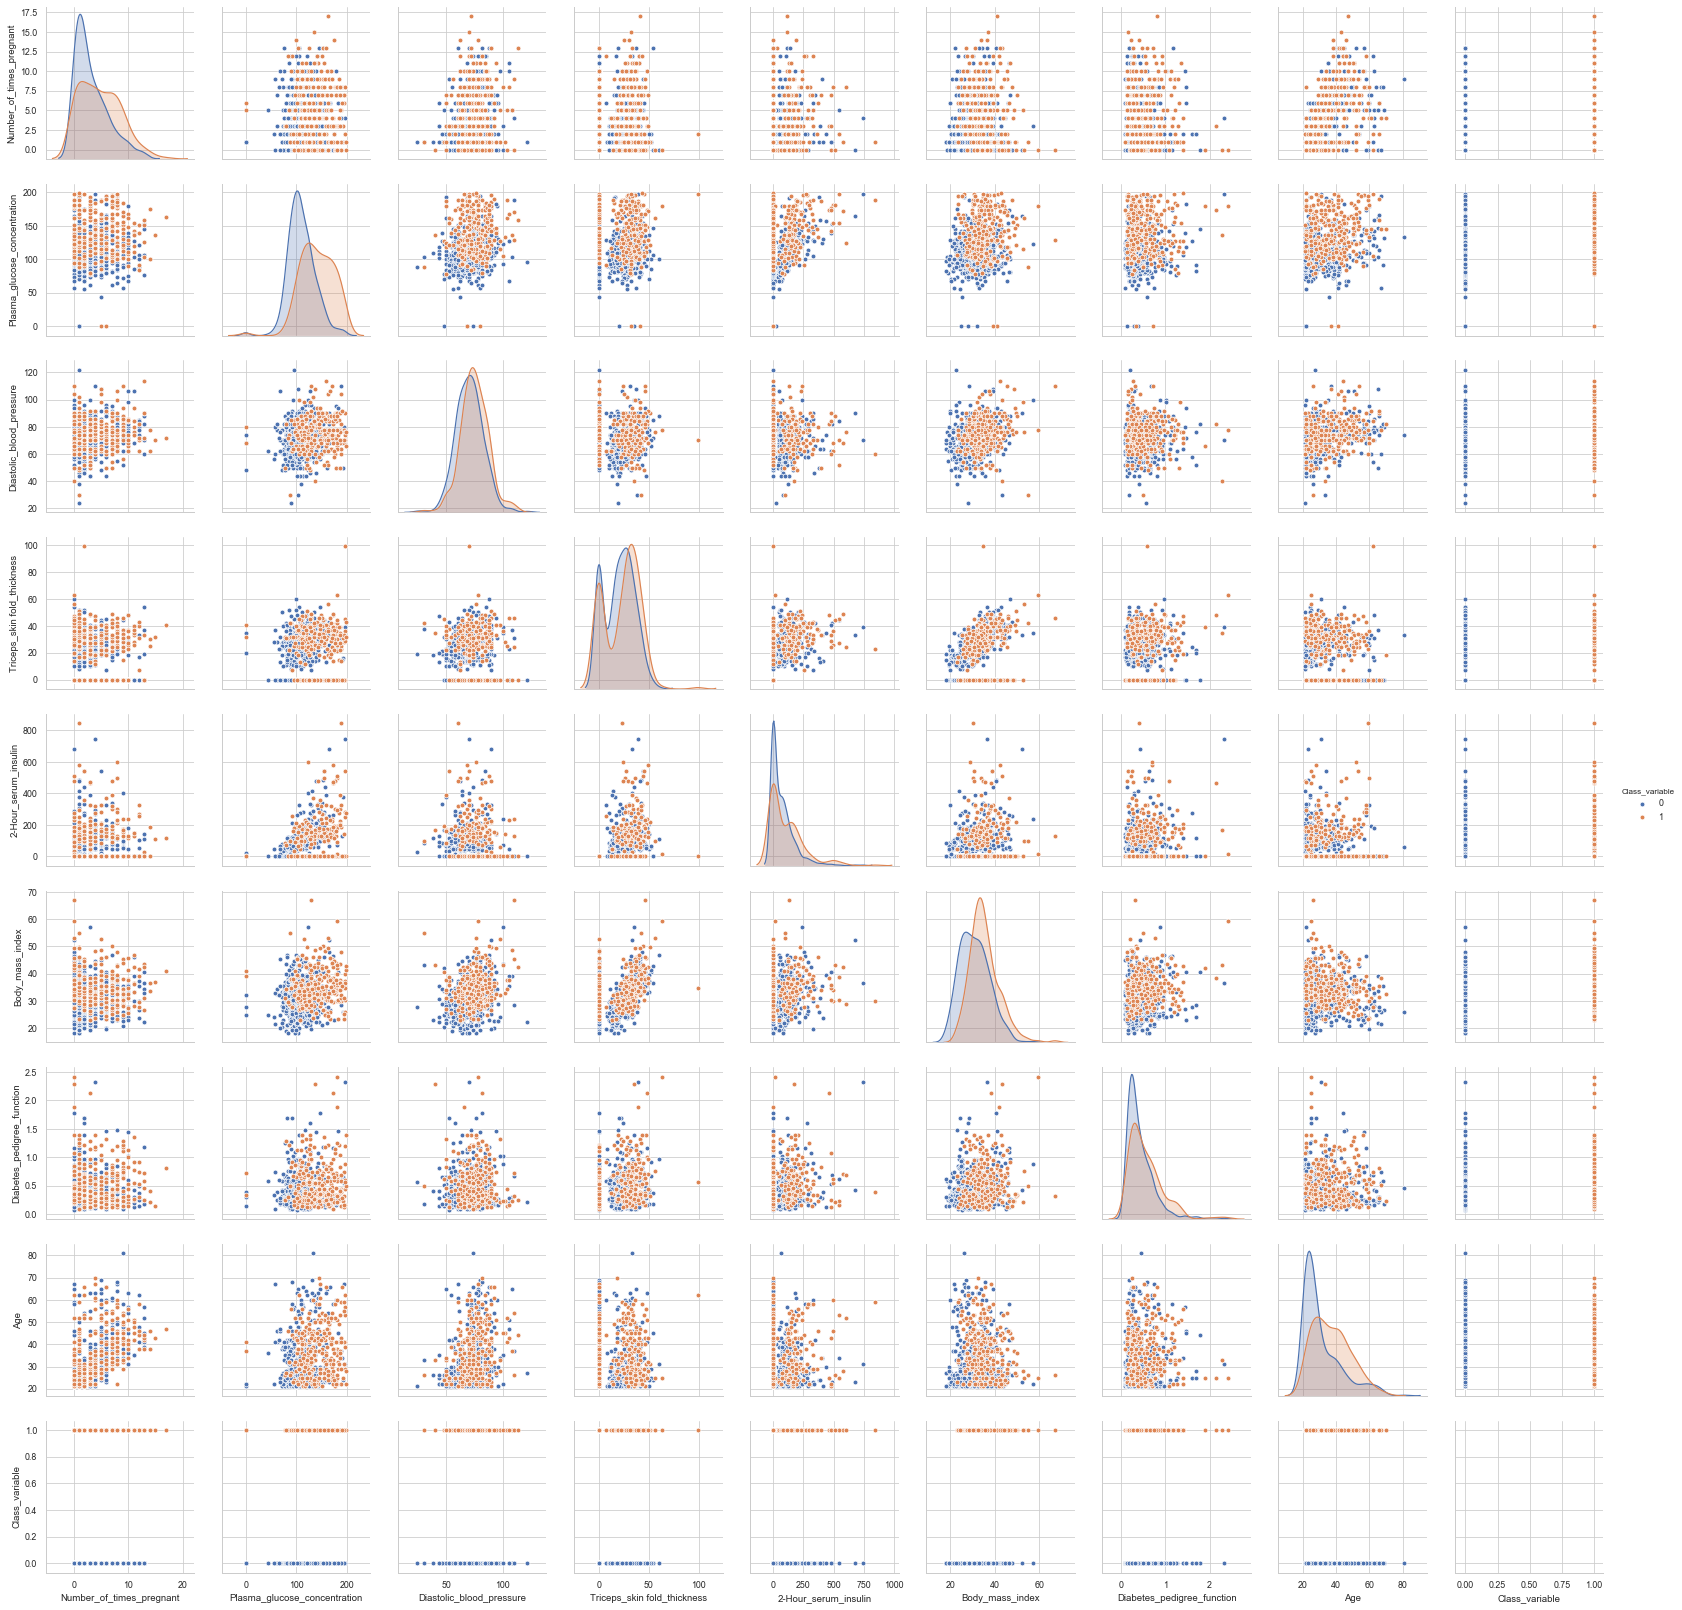

In [382]:
sns.pairplot(df, hue='Class_variable')

At first glance it may look like we don't have to classes that are linearly seperable. For a model like Perceptron, where convergence of to classes are only guaranteeded if they are linearly seperable, this may be hard. It may be a reasonable guess to think that the Adaline model would to better on this dataset.

### Task 2: removing all suspsect pasients

In [374]:
indexing = df.query('Diastolic_blood_pressure == 0 | Body_mass_index == 0').index.tolist() #using df.query to pick out the columns i want
df = df.drop(indexing).reset_index(drop = True) # resetting the indexing because we have removed values

### Creating functions for splitting and standarizing data

In [375]:
def scale_features_data(df, X_train, X_test):
    """
    From lecture: standardizes our data-subsets.
    """
    X_train_std = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0, ddof=0)
    X_test_std = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0, ddof=0)   
    
    return X_train_std, X_test_std

In [376]:
def split_dataset(df, num_training_data):
    """
    Splits our dataset into the desired subsets for training and testing.
    """
    X_train = df.iloc[:num_training_data].drop('Class_variable', axis=1).values
    X_test = df.iloc[num_training_data:].drop('Class_variable', axis=1).values
    
    y_train = df.iloc[:num_training_data, 8].values
    y_test = df.iloc[num_training_data:, 8].values
    
    y_train = np.where(y_train == 0, -1, 1)
    y_test = np.where(y_test == 0, -1, 1)
    
    return X_train, X_test, y_train, y_test

In [377]:
#training_set = df.loc[:399, :].values
#test_set = df.loc[400:, :].values

In [232]:
#X_train = training_set[:, :8].values
#y_train = np.where(training_set[:, -1] == 0, -1, 1)
#X_test = test_set[:, :8]
#y_test = np.where(test_set[:, -1] == 0, -1, 1)

### Creating column names and index names for use later

In [149]:
Perceptron_columns = ['Epoch ' + str(name)  for name in range(1,51)]
Perceptron_index = [str(index) + ' out of 400' for index in range(50, 450, 50)]

### Task 3: training the 400 models, computing classification accuracy and storing them in a dataframe

### Perceptron algorithm

In [378]:
df_Perceptron = pd.DataFrame(columns =range(1,51), index=range(50, 450, 50)) #creating df

for column in list(range(1,51)):
    df_Perceptron[column] = df_Perceptron[column].astype(float)
    #for a weird reason the heatmap plotting woldnt work unless the values was float, so that is the reason
    #for me doing this
    
    
    
for nrows in range(50, 450, 50):
    for epoch in range(1,51):
        X_train, X_test, y_train, y_test = split_dataset(df, nrows) #splitting the dataset with the func created
        X_train_std, X_test_std = scale_features_data(df, X_train, X_test) #Standarizing the datasets
        ppn = Perceptron(eta=0.0001, n_iter=epoch) #Creating Perceptron object    
        #train model here
        ppn.fit(X_train_std, y_train)
        # predict
        y_pred = ppn.predict(X_test_std)
        
        
        # find accuracy
        accuracy = (y_test == y_pred).sum() / len(y_test) * 100
        df_Perceptron.loc[nrows, epoch] = accuracy
        
        
df_Perceptron.columns = Perceptron_columns
df_Perceptron.index = Perceptron_index


initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01


initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01


initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01


initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01


initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01


initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01


initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01744812 -0.00761207  0.00319039]

initial weights: [ 0.01624345 -0.00611756 -0.00528172 -0.01072969  0.00865408 -0.02301539
  0.01

,Epoch 1,Epoch 2,Epoch 3,Epoch 4,Epoch 5,Epoch 6,Epoch 7,Epoch 8,Epoch 9,Epoch 10,...,Epoch 41,Epoch 42,Epoch 43,Epoch 44,Epoch 45,Epoch 46,Epoch 47,Epoch 48,Epoch 49,Epoch 50
50 out of 400,41.678940,48.895434,53.166421,55.081001,56.259205,59.204713,60.972018,63.475700,63.917526,65.390280,...,67.157585,64.359352,64.212077,70.397644,67.304860,64.948454,66.421208,68.483063,62.886598,69.513991
100 out of 400,47.217806,56.915739,62.480127,64.228935,66.931638,68.521463,70.906200,71.224165,72.655008,73.290938,...,75.198728,71.701113,72.178060,77.106518,73.290938,71.065183,73.608903,75.834658,73.131955,73.449921
150 out of 400,54.231434,64.421416,69.775475,73.056995,74.784111,75.647668,76.165803,75.474957,72.538860,69.948187,...,67.702936,65.457686,69.084629,74.438687,72.193437,65.284974,67.012090,66.839378,70.639033,67.702936
200 out of 400,59.168242,68.241966,74.669187,75.803403,77.504726,74.858223,75.425331,72.589792,70.321361,70.510397,...,74.102079,72.967864,69.754253,72.211720,73.913043,75.803403,73.345936,70.510397,71.644612,74.858223
250 out of 400,62.004175,70.563674,73.486430,73.068894,66.388309,54.906054,65.344468,65.762004,62.004175,65.762004,...,60.542797,60.542797,66.388309,63.674322,66.805846,68.893528,67.640919,63.048017,62.421712,67.223382
300 out of 400,65.268065,75.058275,77.389277,74.825175,75.291375,75.524476,75.291375,75.058275,78.088578,76.456876,...,74.592075,78.088578,76.456876,79.020979,78.321678,76.223776,75.990676,75.757576,76.923077,76.223776
350 out of 400,68.337731,76.517150,69.656992,70.184697,66.226913,73.614776,72.559367,62.269129,63.588391,66.490765,...,67.810026,68.601583,61.213720,63.588391,73.878628,70.184697,65.963061,73.878628,67.810026,69.129288
400 out of 400,70.212766,76.595745,68.996960,73.252280,68.389058,68.389058,67.173252,70.516717,70.516717,70.820669,...,67.173252,75.379939,68.085106,69.300912,70.212766,63.525836,72.644377,75.683891,69.908815,75.075988


### Doing the same just with adaline algorithm

In [299]:
df_Adaline = pd.DataFrame(columns =range(1,51), index= range(50, 450, 50) )
Adaline_columns = ['Epoch ' + str(name)  for name in range(1,51)]
Adaline_index = [str(index) + ' out of 400' for index in range(50, 450, 50)]

In [300]:
for column in range(1,51):
    df_Adaline[column] = df_Adaline[column].astype(float)
for nrows in range(50, 450, 50):
    for epoch in range(1,51):
        X_train, X_test, y_train, y_test = split_dataset(df, nrows)
        X_train_std, X_test_std = scale_features_data(df, X_train, X_test)
        ada = AdalineGD(eta=0.0001, n_iter=epoch)    
        #train model here
        ada.fit(X_train_std, y_train)
        # predict
        y_pred = ada.predict(X_test_std)
        
        
        # find accuracy
        accuracy = (y_test == y_pred).sum() / len(y_test) * 100
        df_Adaline.loc[nrows, epoch] = accuracy
        
df_Adaline.columns = Adaline_columns
df_Adaline.index = Adaline_index

### Task 4: Plotting the heatmap of Perceptron

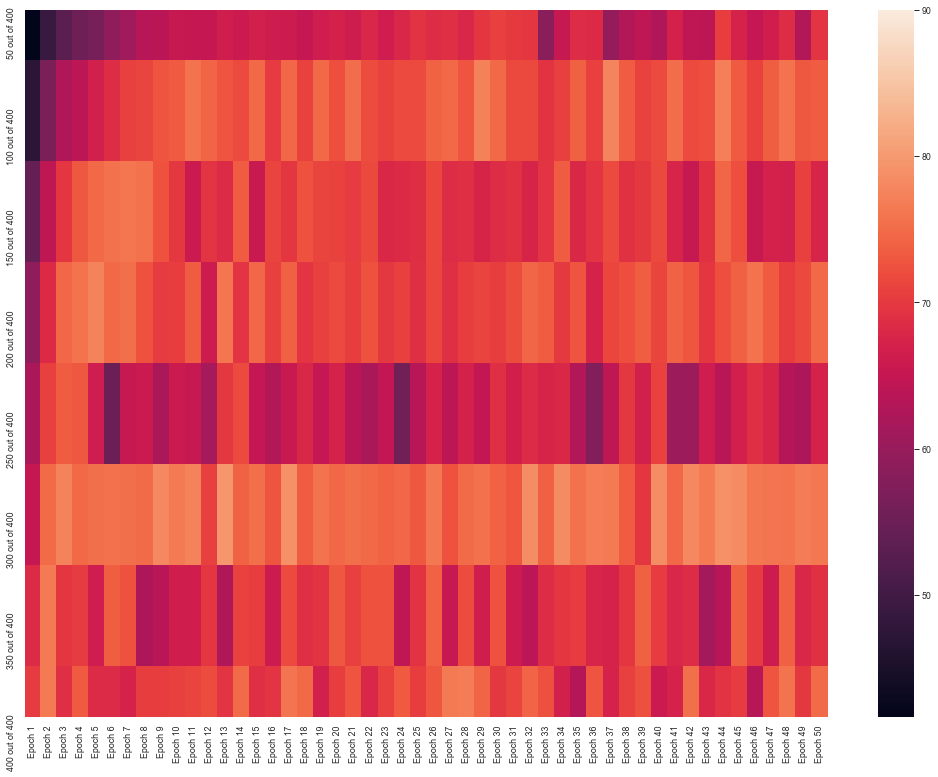

In [270]:
plt.subplots(figsize=(18,13))
ax = sns.heatmap(df_Perceptron, vmax=90)

### Plotting the heatmap of Adaline

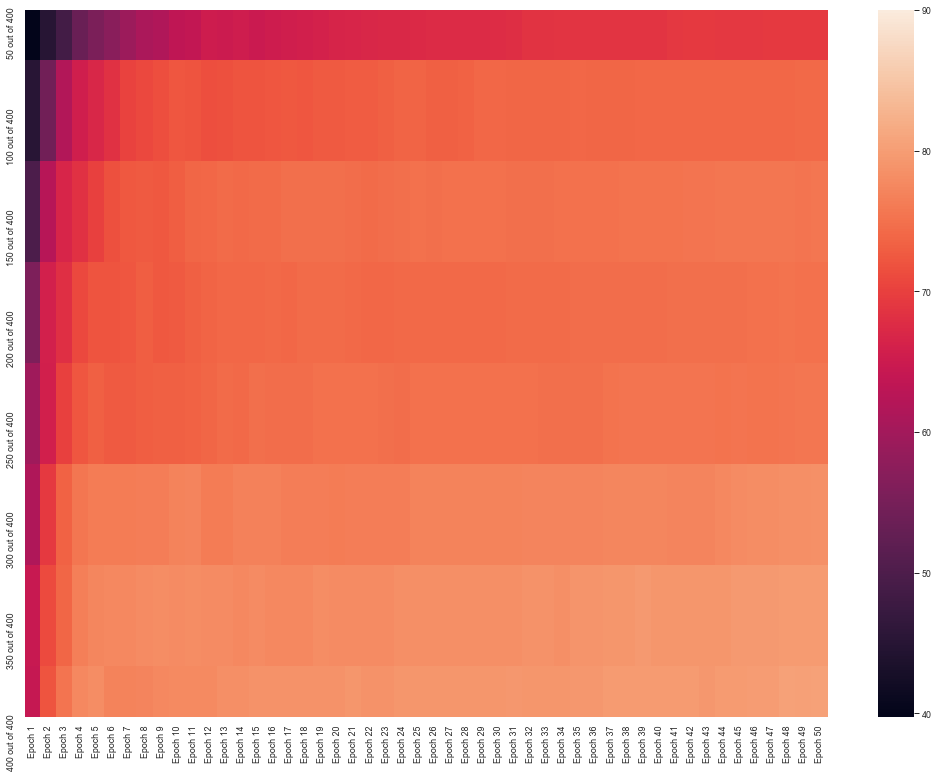

In [304]:
plt.subplots(figsize=(18,13))
ax = sns.heatmap(df_Adaline, vmax=90)

### Task 5: maximum test set classification accuracy

### Perceptron maximum

In [381]:
highest_value_ppn = max(list(df_Perceptron.max())) #storing the highest value found in the dataset
epoch_iteration_ppn = df_Perceptron.max().idxmax() #storing the epoch that was assosciated with highest value
index_value_ppn = df_Perceptron[epoch_iteration].idxmax() #Getting the index for that value as well
print(f'For Perceptron the highest accuracy value was: {highest_value_ppn} \nThe epoch was: {epoch_iteration_ppn} \nThe size of the dataset was: {index_value_ppn}')

For Perceptron the highest accuracy value was: 79.48717948717949 
The epoch was: Epoch 13 
The size of the dataset was: 300 out of 400


### Adaline Maximum

In [380]:
highest_value_ada = max(list(df_Adaline.max())) #storing the highest value found in the dataset
epoch_iteration_ada = df_Adaline.max().idxmax() #storing the epoch that was assosciated with highest value
index_value_ada = df_Adaline[epoch_iteration].idxmax() #Getting the index for that value as well
print(f'For Perceptron the highest accuracy value was: {highest_value_ada} \nThe epoch was: {epoch_iteration_ada} \nThe size of the dataset was: {index_value_ada}')

For Perceptron the highest accuracy value was: 80.54711246200608 
The epoch was: Epoch 48 
The size of the dataset was: 400 out of 400


# TASK 6: training time

The reason for the longer simulation time in Perceptron versus Adaline is that during the Perceptron model training it updates the weight immediately after a misclassification. So during a specific epoch, it can update the weight multiple times. The Adaline only updates at the end of each Epoch. So in a big simulation this will be considerably more time confusing for Perceptron. 